In [ ]:
pip install psycopg2-binary

In [ ]:
import psycopg2

# Establish Database connection
db_params = {
    'database': 'branchdsprojectgps',
    'user': 'datascientist',
    'password': '47eyYBLT0laW5j9U24Uuy8gLcrN',
    'host': 'branchhomeworkdb.ccc0r2wfuew7.us-east-1.rds.amazonaws.com',
    'port': '5432'
}

def fetch_data(query):
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    conn.close()
    return data

# Function to print rows to check the data
def print_rows(data, limit=10):
    counter = 0
    for row in data:
        print(row)
        counter += 1
        if counter >= limit:
            break

# Fetching data
loan_outcomes_query = "SELECT * FROM loan_outcomes"
loan_outcomes_data = fetch_data(loan_outcomes_query)
print("Loan Outcomes Data:")
print_rows(loan_outcomes_data)

user_gps_query = "SELECT * FROM user_gps_fixes"
user_gps_data = fetch_data(user_gps_query)
print("\nUser GPS Data:")
print_rows(user_gps_data)

user_attributes_query = "SELECT * FROM user_attributes"
user_attributes_data = fetch_data(user_attributes_query)
print("\nUser Attributes Data:")
print_rows(user_attributes_data)


Loan Outcomes Data:
(1, datetime.datetime(2017, 8, 14, 9, 8, 50), 'defaulted')
(2, datetime.datetime(2016, 5, 17, 10, 10, 12, 447976), 'repaid')
(3, datetime.datetime(2016, 10, 20, 10, 7, 20, 459081), 'defaulted')
(4, datetime.datetime(2017, 1, 13, 13, 3, 34), 'defaulted')
(5, datetime.datetime(2016, 11, 3, 15, 41, 39, 124610), 'repaid')
(6, datetime.datetime(2018, 2, 25, 14, 43, 24), 'defaulted')
(7, datetime.datetime(2016, 7, 11, 14, 7, 46, 202826), 'repaid')
(8, datetime.datetime(2017, 2, 20, 16, 22, 44), 'defaulted')
(9, datetime.datetime(2018, 1, 3, 16, 21, 38), 'defaulted')
(10, datetime.datetime(2018, 2, 1, 11, 24, 1), 'repaid')

User GPS Data:
(1, datetime.datetime(2017, 6, 22, 9, 37, 20), datetime.datetime(2017, 6, 22, 9, 43, 42), 36.8405401, -1.2943417, 68.4, 0.0, 0.0, 'fused', 1)
(2, datetime.datetime(2017, 8, 14, 7, 50, 27), datetime.datetime(2017, 8, 14, 9, 5, 27), 36.8952702, -1.3419282, 1409.0, 0.0, 0.0, 'fused', 1)
(3, datetime.datetime(2017, 6, 13, 10, 34, 29), datetim

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loan_outcomes_df = pd.DataFrame(loan_outcomes_data, columns=['user_id', 'application_at', 'loan_outcome'])
user_gps_df = pd.DataFrame(user_gps_data, columns=['user_id', 'gps_fix_at', 'server_upload_at','longitude','latitude','altitude', 'bearing','accuracy','location_provider',''])
user_attributes_df = pd.DataFrame(user_attributes_data, columns=['user_id', 'age', 'cash_incoming_30days'])

# Data cleaning and preprocessing
# Check for missing values
print("Missing values in loan outcomes:")
print(loan_outcomes_df.isnull().sum())
print("\nMissing values in user GPS data:")
print(user_gps_df.isnull().sum())
print("\nMissing values in user attributes data:")
print(user_attributes_df.isnull().sum())


Missing values in loan outcomes:
user_id           0
application_at    0
loan_outcome      0
dtype: int64

Missing values in user GPS data:
user_id              0
gps_fix_at           0
server_upload_at     0
longitude            0
latitude             0
altitude             0
bearing              0
accuracy             0
location_provider    0
                     0
dtype: int64

Missing values in user attributes data:
user_id                 0
age                     0
cash_incoming_30days    0
dtype: int64


Loan Outcomes Data EDA:
   user_id             application_at loan_outcome
0        1 2017-08-14 09:08:50.000000    defaulted
1        2 2016-05-17 10:10:12.447976       repaid
2        3 2016-10-20 10:07:20.459081    defaulted
3        4 2017-01-13 13:03:34.000000    defaulted
4        5 2016-11-03 15:41:39.124610       repaid
          user_id
count  400.000000
mean   200.500000
std    115.614301
min      1.000000
25%    100.750000
50%    200.500000
75%    300.250000
max    400.000000
defaulted    200
repaid       200
Name: loan_outcome, dtype: int64

User GPS Data EDA:
   user_id          gps_fix_at    server_upload_at  longitude  latitude  \
0        1 2017-06-22 09:37:20 2017-06-22 09:43:42  36.840540 -1.294342   
1        2 2017-08-14 07:50:27 2017-08-14 09:05:27  36.895270 -1.341928   
2        3 2017-06-13 10:34:29 2017-06-13 10:54:48  36.811903 -1.307220   
3        4 2017-06-18 12:16:20 2017-06-18 12:16:24  36.907049 -1.309984   
4        5 2017-06-28 09:39:08 2017-06-28 09:5

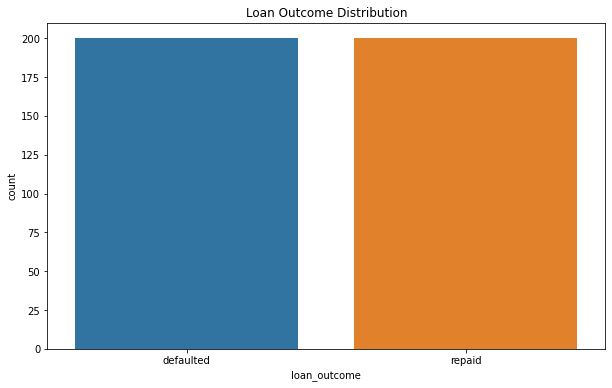

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loan Outcomes Data EDA:")
print(loan_outcomes_df.head())  # Display the first few rows of the dataframe
print(loan_outcomes_df.describe())  # Display summary statistics
print(loan_outcomes_df['loan_outcome'].value_counts())  # Check the distribution of loan outcomes

print("\nUser GPS Data EDA:")
print(user_gps_df.head())  # Display the first few rows of the dataframe
print(user_gps_df.describe())  # Display summary statistics

print("\nUser Attributes Data EDA:")
print(user_attributes_df.head())  # Display the first few rows of the dataframe
print(user_attributes_df.describe())  # Display summary statistics

# data visualization

plt.figure(figsize=(10, 6))
sns.countplot(x='loan_outcome', data=loan_outcomes_df)
plt.title('Loan Outcome Distribution')
plt.show()
#this plot gives us the idea of how the distribution in the 'loan_outcome' column looks like

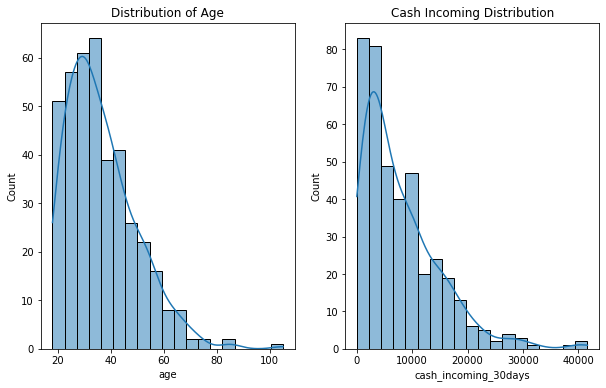

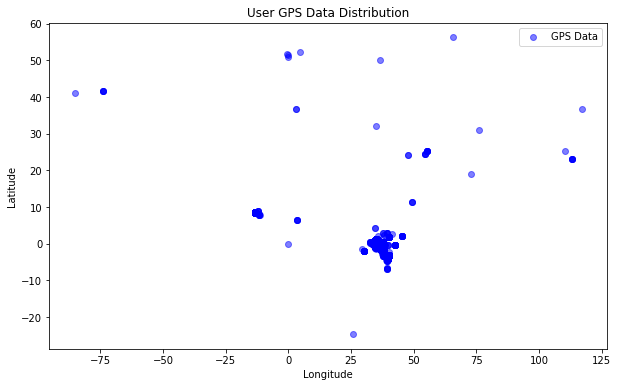

In [ ]:
# data visualization for User Attributes
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_attributes_df['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(user_attributes_df['cash_incoming_30days'], kde=True)
plt.title('Cash Incoming Distribution')
plt.show()

# data visualization for User GPS Data
plt.figure(figsize=(10, 6))
plt.scatter(user_gps_df['longitude'], user_gps_df['latitude'], c='b', alpha=0.5, label='GPS Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('User GPS Data Distribution')
plt.legend()
plt.show()

   The above graphs tells us the information about Distribution of age and distribution of cash incoming and from the second graph we can note that the concentration at (latitude,longitude) = (0,40) is higher hence it is visible that customers in this region tend to open the branch app more often and are using it more.

In [ ]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler

# Extracting features from timestamps
loan_outcomes_df['application_year'] = loan_outcomes_df['application_at'].dt.year
loan_outcomes_df['application_month'] = loan_outcomes_df['application_at'].dt.month

user_gps_df['fix_year'] = user_gps_df['gps_fix_at'].dt.year
user_gps_df['fix_month'] = user_gps_df['gps_fix_at'].dt.month

# Creating derived features from GPS data
user_gps_df['distance_traveled'] = ((user_gps_df['latitude'] - user_gps_df['latitude'].shift()) ** 2 +
                                         (user_gps_df['longitude'] - user_gps_df['longitude'].shift()) ** 2) ** 0.5

# Creating cross-tabulations
cross_tab = pd.crosstab(loan_outcomes_df['application_year'], loan_outcomes_df['loan_outcome'])
print("Cross Tabulation of Loan Outcomes by Application Year:")
print(cross_tab)


Cross Tabulation of Loan Outcomes by Application Year:
loan_outcome      defaulted  repaid
application_year                   
2015                      0       8
2016                     37      59
2017                     80      79
2018                     83      54


The output represents the count of defaulted and repaid loans for each application year. This information can provide insights into the distribution of loan outcomes over the years.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Using LabelEncoder to encode 'loan_outcome'
le = LabelEncoder()
loan_outcomes_df['loan_outcome_encoded'] = le.fit_transform(loan_outcomes_df['loan_outcome'])

# Check the encoded values
print(loan_outcomes_df[['loan_outcome', 'loan_outcome_encoded']].head(5))


  loan_outcome  loan_outcome_encoded
0    defaulted                     0
1       repaid                     1
2    defaulted                     0
3    defaulted                     0
4       repaid                     1


the 'loan_outcome' column is encoded into numerical values, with 'defaulted' represented as 0 and 'repaid' as 1

2. Train a model
a. Train a model that predicts the loan outcome. As you work with the
data, keep in mind that Branch uses a model like this to decide whether to
lend to a potential borrower.
b. Produce a few graphs and metrics demonstrating the model’s
performance. We understand that the data is limited. We are more
interested in your decision making processes (how you train a model,
how you think about evaluating the results, etc.) than your final result.

For classification tasks like predicting the loan outcome, it's more appropriate to use supervised learning algorithms such as logistic regression, decision trees, random forests, or support vector machines. These algorithms are specifically designed to predict the class or category of a data point based on its features.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Selecting features for the model
X = loan_outcomes_df[['application_year', 'application_month']]
y = loan_outcomes_df['loan_outcome_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))




Confusion Matrix:
[[24 13]
 [29 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.65      0.53        37
           1       0.52      0.33      0.40        43

    accuracy                           0.48        80
   macro avg       0.49      0.49      0.47        80
weighted avg       0.49      0.47      0.46        80


Accuracy: 0.475


combining features from different tables through feature engineering can significantly improve the predictive power of the model.

In [ ]:
# Feature Engineering (Combining the features from various tables so that the model improves it accuracy)
import pandas as pd
# Merge the dataframes on the 'user_id' column
merged_df = loan_outcomes_df.merge(user_attributes_df, on='user_id', how='left').merge(user_gps_df, on='user_id', how='left')

# Feature engineering for temporal features
merged_df['application_year'] = loan_outcomes_df['application_year']
merged_df['application_month'] = loan_outcomes_df['application_month']

# Feature engineering for location-based features
merged_df['distance_from_branch'] = ((merged_df['latitude'] - user_gps_df['latitude']) ** 2 + (merged_df['longitude'] - user_gps_df['longitude']) ** 2) ** 0.5

# Aggregating user attributes
user_attributes_agg = user_attributes_df.groupby('user_id').agg({'age': ['mean', 'std'], 'cash_incoming_30days': ['mean', 'std']})
user_attributes_agg.columns = ['_'.join(col) for col in user_attributes_agg.columns]
merged_df = merged_df.merge(user_attributes_agg, on='user_id', how='left')

# Creating interaction features
merged_df['age_times_cash_incoming'] = merged_df['age'] * merged_df['cash_incoming_30days']

# Handling NaN values
merged_df.drop(['age_std', 'cash_incoming_30days_std'], axis=1, inplace=True)

# Final dataset for modeling
final_data = merged_df[['application_year', 'application_month', 'distance_from_branch', 'age', 'cash_incoming_30days', 'age_mean', 'cash_incoming_30days_mean', 'age_times_cash_incoming', 'loan_outcome_encoded']]

In [ ]:
final_data.head(10)

,application_year,application_month,distance_from_branch,age,cash_incoming_30days,age_mean,cash_incoming_30days_mean,age_times_cash_incoming,loan_outcome_encoded
0,2017,8,0.0,42,8988.12,42.0,8988.12,377501.04,0
1,2016,5,0.0,36,9968.12,36.0,9968.12,358852.32,1
2,2016,10,0.0,27,59.04,27.0,59.04,1594.08,0
3,2017,1,0.0,38,2129.03,38.0,2129.03,80903.14,0
4,2016,11,0.0,33,2102.53,33.0,2102.53,69383.49,1
5,2018,2,0.0,42,9305.85,42.0,9305.85,390845.70,0
6,2016,7,0.0,28,2726.06,28.0,2726.06,76329.68,1
7,2017,2,0.0,25,6530.59,25.0,6530.59,163264.75,0
8,2018,1,0.0,25,1715.96,25.0,1715.96,42899.00,0
9,2018,2,0.0,34,9260.69,34.0,9260.69,314863.46,1


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_year           400 non-null    int64  
 1   application_month          400 non-null    int64  
 2   distance_from_branch       400 non-null    float64
 3   age                        400 non-null    int64  
 4   cash_incoming_30days       400 non-null    float64
 5   age_mean                   400 non-null    float64
 6   cash_incoming_30days_mean  400 non-null    float64
 7   age_times_cash_incoming    400 non-null    float64
 8   loan_outcome_encoded       400 non-null    int32  
dtypes: float64(5), int32(1), int64(3)
memory usage: 29.7 KB


Confusion Matrix:
[[20 17]
 [19 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.54      0.53        37
           1       0.59      0.56      0.57        43

    accuracy                           0.55        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.55      0.55      0.55        80



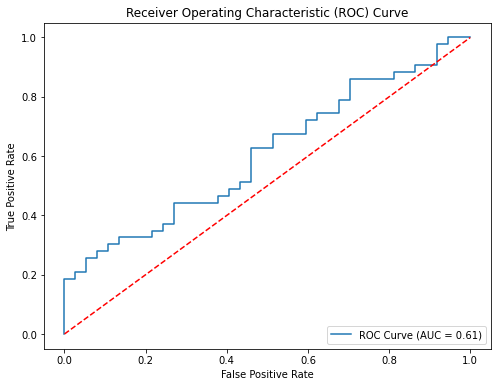

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

X = final_data.drop('loan_outcome_encoded', axis=1)
y = final_data['loan_outcome_encoded']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Comparing the two sets of results(Before and after Feature Engineering and combining the features), the updated model has a higher accuracy, precision, recall, and F1-score for both classes. Additionally, the AUC value of the ROC curve increased to 0.62, which indicates an improved ability of the model to distinguish between the two classes.

The Confusion Matrix shows that there is a better balance between the true positive and false positive predictions, which is reflected in the increased precision and recall scores for both classes.

3. Expose your trained model through a simple API. Pretend this API will be
used in a production system that requests the model’s prediction for a user; the
prediction helps Branch decide whether to give this user a loan. You should be
able to send the user ID and/or raw data for a user (from the database) to this
API and return a prediction. This is not necessarily a REST / HTTP API, just
anything that could be “called” by some other system.

In [ ]:
def loan_prediction_api(user_data):
    # Making prediction using the trained model
    prediction = model.predict(user_data)

    return prediction

# API function
user_data = {
    'application_year': 2016,
    'application_month': 10,
    'distance_from_branch': 0.0,
    'age': 27,
    'cash_incoming_30days': 59.04,
    'age_mean': 27.0,
    'cash_incoming_30days_mean': 59.04,
    'age_times_cash_incoming':1594.08
}

prediction = loan_prediction_api([[
    user_data['application_year'],
    user_data['application_month'],
    user_data['distance_from_branch'],
    user_data['age'],
    user_data['cash_incoming_30days'],
    user_data['age_mean'],
    user_data['cash_incoming_30days_mean'],
    user_data['age_times_cash_incoming']
]])
if prediction==[1]:
    print("repaid")
else:
    print("defaulted")


defaulted


C:\Users\suhana\Downloads\python anaconda install\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[1] indicates the user will fall under the category 'repaid' and [2] indicates 'defaulted'

In [ ]:
user_data_2 = {
    'application_year': 2023,
    'application_month': 6,
    'distance_from_branch': 2.3,
    'age': 28,
    'cash_incoming_30days': 3000,
    'age_mean': 32,
    'cash_incoming_30days_mean': 3200,
    'age_times_cash_incoming': 96000
}

prediction_2 = loan_prediction_api([[
    user_data_2['application_year'],
    user_data_2['application_month'],
    user_data_2['distance_from_branch'],
    user_data_2['age'],
    user_data_2['cash_incoming_30days'],
    user_data_2['age_mean'],
    user_data_2['cash_incoming_30days_mean'],
    user_data_2['age_times_cash_incoming']
]])
if prediction==[1]:
    print("repaid")
else:
    print("defaulted")


defaulted


C:\Users\suhana\Downloads\python anaconda install\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
user_data_3 = {
    'application_year': 2016,
    'application_month': 5,
    'distance_from_branch': 0.0,
    'age': 36,
    'cash_incoming_30days': 9968.12,
    'age_mean': 36,
    'cash_incoming_30days_mean': 9968.12,
    'age_times_cash_incoming': 358852.32
}

prediction_3 = loan_prediction_api([[
    user_data_3['application_year'],
    user_data_3['application_month'],
    user_data_3['distance_from_branch'],
    user_data_3['age'],
    user_data_3['cash_incoming_30days'],
    user_data_3['age_mean'],
    user_data_3['cash_incoming_30days_mean'],
    user_data_3['age_times_cash_incoming']
]])

if prediction_3 == [1]:
    print("repaid")
else:
    print("defaulted")


repaid


C:\Users\suhana\Downloads\python anaconda install\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
